In [95]:
# 单元格1: 环境设置与路径配置
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("🎯 开始设置Jupyter Notebook环境...")
print("=" * 60)

# 获取当前notebook文件所在目录
notebook_dir = os.getcwd()
print(f"📁 当前工作目录: {notebook_dir}")

# 计算项目根目录（notebooks的父目录）
project_root = os.path.dirname(notebook_dir)
print(f"📁 项目根目录: {project_root}")

# 计算src目录路径
src_dir = os.path.join(project_root, 'src')
print(f"📁 src目录: {src_dir}")

# 将项目根目录和src目录添加到Python路径
if project_root not in sys.path:
    sys.path.insert(0, project_root)
if src_dir not in sys.path:
    sys.path.insert(0, src_dir)

print("✅ Python路径配置完成:")
for i, path in enumerate(sys.path[:3], 1):
    print(f"  {i}. {path}")

# 现在尝试导入utils模块
try:
    # 方法1: 直接导入
    from src.utils import setup_visualization, load_data, clean_movie_data, save_cleaned_data
    print("✅ 成功从src.utils导入函数")
except ImportError as e:
    print(f"⚠️ 方法1失败: {e}")
    try:
        # 方法2: 直接导入utils
        import utils
        setup_visualization = utils.setup_visualization
        load_data = utils.load_data
        clean_movie_data = utils.clean_movie_data
        save_cleaned_data = utils.save_cleaned_data
        print("✅ 成功直接导入utils模块")
    except ImportError as e2:
        print(f"⚠️ 方法2失败: {e2}")
        try:
            # 方法3: 使用importlib直接加载
            import importlib.util
            utils_path = os.path.join(src_dir, 'utils.py')
            spec = importlib.util.spec_from_file_location("utils", utils_path)
            utils = importlib.util.module_from_spec(spec)
            spec.loader.exec_module(utils)
            setup_visualization = utils.setup_visualization
            load_data = utils.load_data
            clean_movie_data = utils.clean_movie_data
            save_cleaned_data = utils.save_cleaned_data
            print("✅ 成功使用importlib加载utils模块")
        except Exception as e3:
            print(f"❌ 所有导入方法都失败: {e3}")
            print("🔧 将直接在此定义必要函数...")
            
            # 内联定义基本函数
            def setup_visualization():
                plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
                plt.rcParams['axes.unicode_minus'] = False
                sns.set_style("whitegrid")
                plt.rcParams['figure.figsize'] = (12, 6)
                print("✅ 可视化环境设置完成")
            
            def load_data(data_path=None):
                if data_path is None:
                    data_path = os.path.join(project_root, 'data', 'raw', 'movie_metadata.csv')
                print(f"📂 正在从 {data_path} 加载数据...")
                try:
                    df = pd.read_csv(data_path)
                    print(f"✅ 数据加载成功: {df.shape[0]} 行, {df.shape[1]} 列")
                    return df
                except Exception as e:
                    print(f"❌ 数据加载失败: {e}")
                    return None
            
            def clean_movie_data(df):
                print("🧹 数据清洗功能暂未实现，将使用原始数据")
                return df
            
            def save_cleaned_data(df, filename="movies_cleaned.csv"):
                output_dir = os.path.join(project_root, 'data', 'processed')
                os.makedirs(output_dir, exist_ok=True)
                output_path = os.path.join(output_dir, filename)
                df.to_csv(output_path, index=False)
                print(f"💾 数据已保存到: {output_path}")
                return output_path

# 设置可视化环境
setup_visualization()

# 检查数据目录
data_raw_dir = os.path.join(project_root, 'data', 'raw')
data_processed_dir = os.path.join(project_root, 'data', 'processed')

print(f"\n📁 数据目录检查:")
print(f"原始数据目录: {data_raw_dir} - {'✅ 存在' if os.path.exists(data_raw_dir) else '❌ 不存在'}")
print(f"处理数据目录: {data_processed_dir} - {'✅ 存在' if os.path.exists(data_processed_dir) else '❌ 不存在'}")

# 列出原始数据目录中的文件
if os.path.exists(data_raw_dir):
    raw_files = os.listdir(data_raw_dir)
    print(f"原始数据文件: {raw_files}")
else:
    print("⚠️ 原始数据目录不存在，将自动创建")
    os.makedirs(data_raw_dir, exist_ok=True)

# 确保处理数据目录存在
os.makedirs(data_processed_dir, exist_ok=True)

print("\n🎉 环境设置完成! 可以开始数据分析")

🎯 开始设置Jupyter Notebook环境...
📁 当前工作目录: f:\courses\python\movie-analysis\notebooks
📁 项目根目录: f:\courses\python\movie-analysis
📁 src目录: f:\courses\python\movie-analysis\src
✅ Python路径配置完成:
  1. f:\courses\python\movie-analysis\src
  2. f:\courses\python\movie-analysis
  3. C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\python312.zip
✅ 成功从src.utils导入函数
✅ 可视化环境设置完成

📁 数据目录检查:
原始数据目录: f:\courses\python\movie-analysis\data\raw - ✅ 存在
处理数据目录: f:\courses\python\movie-analysis\data\processed - ✅ 存在
原始数据文件: ['movie_metadata.csv']

🎉 环境设置完成! 可以开始数据分析


In [96]:
# 单元格2: 加载数据
# 指定数据路径
data_path = "../data/raw/movie_metadata.csv"

# 加载数据
movies_df = load_data(data_path)

# 查看数据基本信息
print("\n📊 数据集基本信息:")
print("=" * 50)
print(f"数据集形状: {movies_df.shape}")
print(f"行数: {movies_df.shape[0]}")
print(f"列数: {movies_df.shape[1]}")

print("\n📋 数据集前5行:")
display(movies_df.head())

print("\n🔍 数据集列名:")
for i, col in enumerate(movies_df.columns, 1):
    print(f"{i:2d}. {col}")

📂 正在从 ../data/raw/movie_metadata.csv 加载数据...
✅ 数据加载成功: 5043 行, 28 列

📊 数据集基本信息:
数据集形状: (5043, 28)
行数: 5043
列数: 28

📋 数据集前5行:


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0



🔍 数据集列名:
 1. color
 2. director_name
 3. num_critic_for_reviews
 4. duration
 5. director_facebook_likes
 6. actor_3_facebook_likes
 7. actor_2_name
 8. actor_1_facebook_likes
 9. gross
10. genres
11. actor_1_name
12. movie_title
13. num_voted_users
14. cast_total_facebook_likes
15. actor_3_name
16. facenumber_in_poster
17. plot_keywords
18. movie_imdb_link
19. num_user_for_reviews
20. language
21. country
22. content_rating
23. budget
24. title_year
25. actor_2_facebook_likes
26. imdb_score
27. aspect_ratio
28. movie_facebook_likes


In [97]:
# 单元格3: 数据概览
print("📈 数据概览信息:")
print("=" * 50)
movies_df.info()

📈 数据概览信息:
<class 'pandas.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   str    
 1   director_name              4939 non-null   str    
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   str    
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   str    
 10  actor_1_name               5036 non-null   str    
 11  movie_title                5043 non-null   str    
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64 

In [98]:
# 单元格4: 数值型数据统计描述
print("📊 数值型列统计描述:")
print("=" * 50)
numeric_cols = movies_df.select_dtypes(include=[np.number]).columns.tolist()
display(movies_df[numeric_cols].describe().T)

📊 数值型列统计描述:


,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4939.0,6.865092e+02,2.813329e+03,0.00,7.00,49.00,194.50,2.300000e+04
actor_3_facebook_likes,5020.0,6.450098e+02,1.665042e+03,0.00,133.00,371.50,636.00,2.300000e+04
actor_1_facebook_likes,5036.0,6.560047e+03,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,4159.0,4.846841e+07,6.845299e+07,162.00,5340987.50,25517500.00,62309437.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,65.00,156.00,326.00,5.060000e+03


In [99]:
# 单元格5: 清洗数据
movies_clean = clean_movie_data(movies_df)

# 查看清洗后的数据
print("\n✨ 清洗后的数据:")
print("=" * 50)
display(movies_clean.head())

print("\n🔍 清洗后的数据类型:")
movies_clean.info()

🧹 开始数据清洗...
原始数据形状: (5043, 28)
列名: ['color', 'director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']
✅ 电影标题已清理
✅ 删除了 45 个重复记录

🔍 缺失值统计:


,缺失数量,缺失百分比%
gross,874,17.49
budget,487,9.74
aspect_ratio,327,6.54
content_rating,301,6.02
plot_keywords,152,3.04
title_year,107,2.14
director_name,103,2.06
director_facebook_likes,103,2.06
num_critic_for_reviews,49,0.98
actor_3_name,23,0.46


✅ 删除评分缺失记录: 0 行
✅ 已用中位数填充: duration
✅ 已用中位数填充: budget
✅ 已用中位数填充: gross
✅ 已用中位数填充: num_critic_for_reviews
✅ 已用中位数填充: num_voted_users
✅ 已用中位数填充: num_user_for_reviews
✅ 已用中位数填充: director_facebook_likes
✅ 已用中位数填充: cast_total_facebook_likes
✅ 已用中位数填充: movie_facebook_likes
✅ 已用众数填充: color
✅ 已用众数填充: country
✅ 已用众数填充: language
✅ 已用众数填充: content_rating
✅ 已用众数填充: aspect_ratio
✅ 已用众数填充: director_name
✅ 已创建新特征: movie_age, decade
✅ 已创建新特征: roi (投资回报率)
✅ 过滤异常时长: 移除 8 行

🎉 数据清洗完成!
清洗后数据形状: (4990, 31)

✨ 清洗后的数据:


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,movie_age,decade,roi
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,17.0,2000.0,2.208885
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,19.0,2000.0,0.031347
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,11.0,2010.0,-0.183371
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,14.0,2010.0,0.792523
4,Color,Doug Walker,110.0,103.0,131.0,NaN,Rob Walker,131.0,25445749.0,Documentary,...,R,20000000.0,NaN,12.0,7.1,2.35,0,NaN,NaN,0.272287



🔍 清洗后的数据类型:
<class 'pandas.DataFrame'>
Index: 4990 entries, 0 to 5042
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4990 non-null   str    
 1   director_name              4990 non-null   str    
 2   num_critic_for_reviews     4990 non-null   float64
 3   duration                   4990 non-null   float64
 4   director_facebook_likes    4990 non-null   float64
 5   actor_3_facebook_likes     4967 non-null   float64
 6   actor_2_name               4977 non-null   str    
 7   actor_1_facebook_likes     4983 non-null   float64
 8   gross                      4990 non-null   float64
 9   genres                     4990 non-null   str    
 10  actor_1_name               4983 non-null   str    
 11  movie_title                4990 non-null   str    
 12  num_voted_users            4990 non-null   int64  
 13  cast_total_facebook_likes  4990 non-null   int64  


In [100]:
# 单元格6: 保存清洗后的数据
cleaned_path = save_cleaned_data(movies_clean)

💾 清洗后的数据已保存到: ../data/processed\movies_cleaned.csv


🎯 IMDb评分分布分析


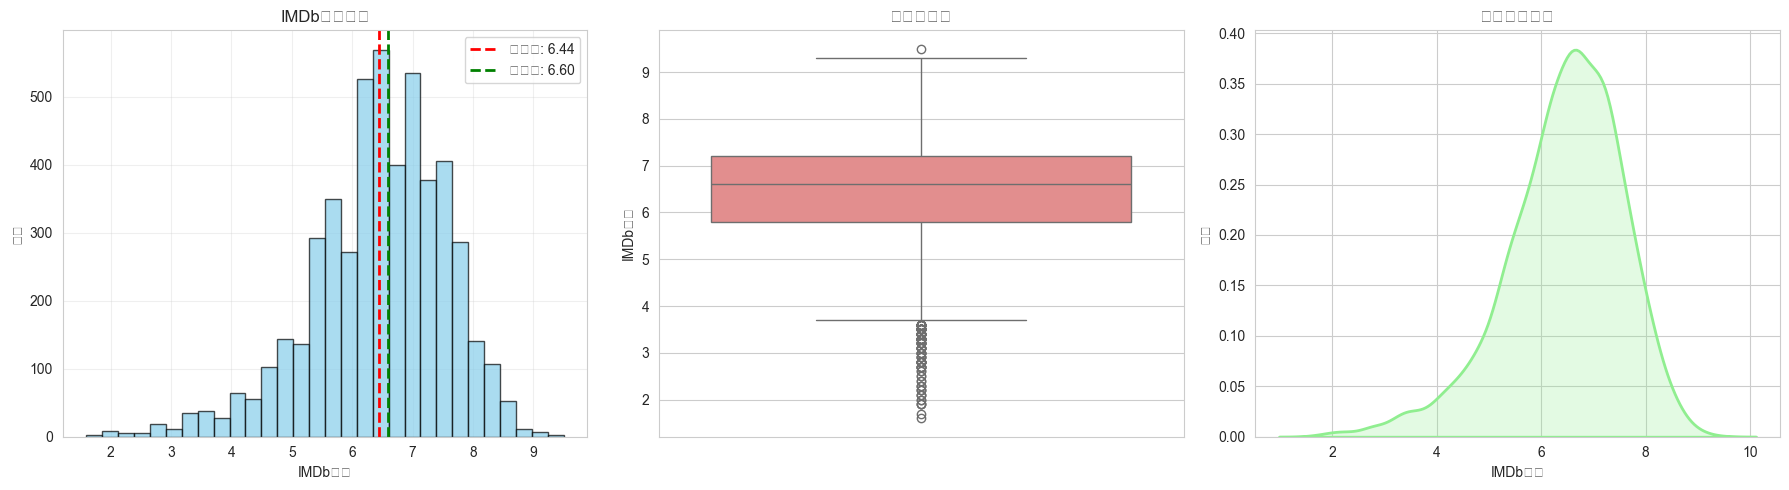


📈 评分统计信息:
平均评分: 6.44
中位数: 6.60
标准差: 1.12
最小值: 1.60
最大值: 9.50
四分位数(Q1): 5.80
四分位数(Q3): 7.20


In [101]:
# 单元格7: IMDb评分分布分析
print("🎯 IMDb评分分布分析")
print("=" * 50)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. 评分直方图
axes[0].hist(movies_clean['imdb_score'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].axvline(movies_clean['imdb_score'].mean(), color='red', linestyle='--', linewidth=2, label=f'平均值: {movies_clean["imdb_score"].mean():.2f}')
axes[0].axvline(movies_clean['imdb_score'].median(), color='green', linestyle='--', linewidth=2, label=f'中位数: {movies_clean["imdb_score"].median():.2f}')
axes[0].set_xlabel('IMDb评分')
axes[0].set_ylabel('频数')
axes[0].set_title('IMDb评分分布')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. 评分箱线图
sns.boxplot(y=movies_clean['imdb_score'], ax=axes[1], color='lightcoral')
axes[1].set_ylabel('IMDb评分')
axes[1].set_title('评分箱线图')

# 3. 评分密度图
sns.kdeplot(movies_clean['imdb_score'], ax=axes[2], fill=True, color='lightgreen', linewidth=2)
axes[2].set_xlabel('IMDb评分')
axes[2].set_ylabel('密度')
axes[2].set_title('评分密度分布')

plt.tight_layout()
plt.show()

# 评分统计
print("\n📈 评分统计信息:")
rating_stats = {
    '平均评分': movies_clean['imdb_score'].mean(),
    '中位数': movies_clean['imdb_score'].median(),
    '标准差': movies_clean['imdb_score'].std(),
    '最小值': movies_clean['imdb_score'].min(),
    '最大值': movies_clean['imdb_score'].max(),
    '四分位数(Q1)': movies_clean['imdb_score'].quantile(0.25),
    '四分位数(Q3)': movies_clean['imdb_score'].quantile(0.75)
}

for stat, value in rating_stats.items():
    print(f"{stat}: {value:.2f}")

⏱️ 电影时长分析


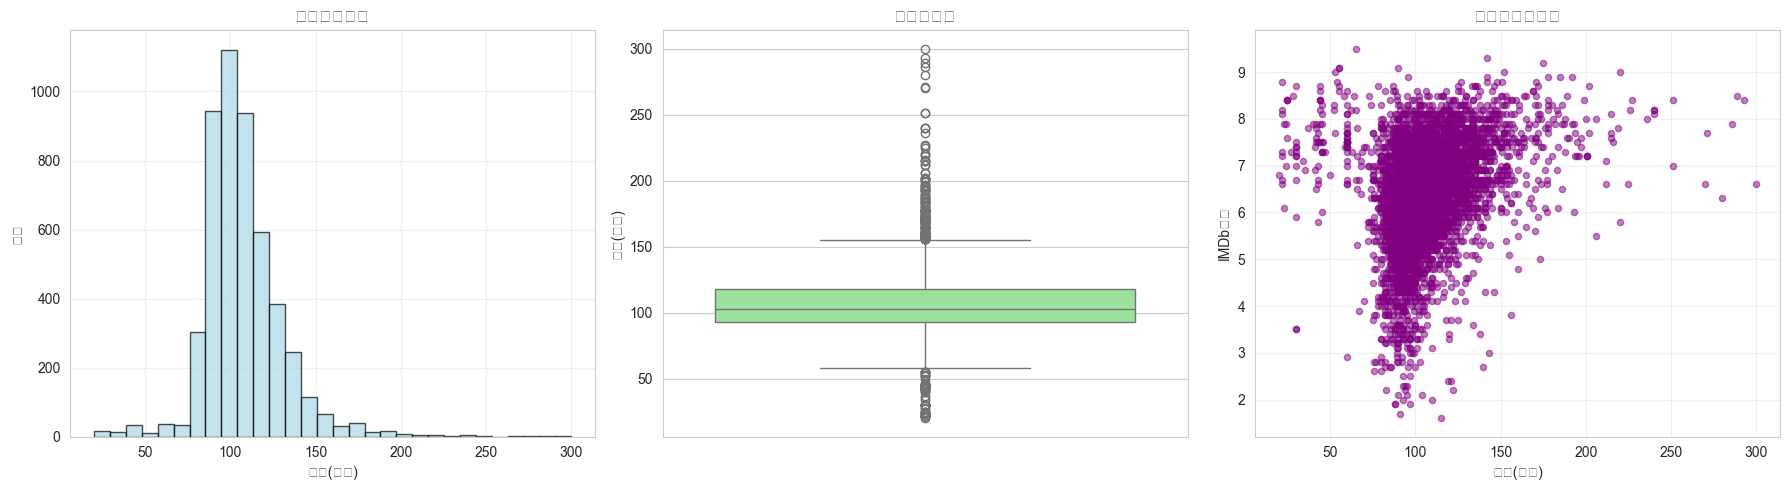


📊 各时长分组的电影数量:


duration_category
<1小时        104
1-1.5小时     838
1.5-2小时    2990
2-2.5小时     858
2.5-3小时     138
>3小时         62
Name: count, dtype: int64


📈 各时长分组的平均评分:


,mean,count
duration_category,,
<1小时,7.484615,104
1-1.5小时,5.948210,838
1.5-2小时,6.324482,2990
2-2.5小时,6.963636,858
2.5-3小时,7.350725,138
>3小时,7.609677,62


In [102]:
# 单元格8: 电影时长分析
if 'duration' in movies_clean.columns:
    print("⏱️ 电影时长分析")
    print("=" * 50)
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # 1. 时长分布
    axes[0].hist(movies_clean['duration'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='lightblue')
    axes[0].set_xlabel('时长(分钟)')
    axes[0].set_ylabel('频数')
    axes[0].set_title('电影时长分布')
    axes[0].grid(True, alpha=0.3)
    
    # 2. 时长箱线图
    sns.boxplot(y=movies_clean['duration'], ax=axes[1], color='lightgreen')
    axes[1].set_ylabel('时长(分钟)')
    axes[1].set_title('时长箱线图')
    
    # 3. 时长与评分的关系
    if 'imdb_score' in movies_clean.columns:
        axes[2].scatter(movies_clean['duration'], movies_clean['imdb_score'], alpha=0.5, s=20, color='purple')
        axes[2].set_xlabel('时长(分钟)')
        axes[2].set_ylabel('IMDb评分')
        axes[2].set_title('时长与评分关系')
        axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 时长分组分析
    duration_bins = [0, 60, 90, 120, 150, 180, 300]
    duration_labels = ['<1小时', '1-1.5小时', '1.5-2小时', '2-2.5小时', '2.5-3小时', '>3小时']
    
    movies_clean['duration_category'] = pd.cut(movies_clean['duration'], 
                                                bins=duration_bins, 
                                                labels=duration_labels)
    
    print("\n📊 各时长分组的电影数量:")
    duration_counts = movies_clean['duration_category'].value_counts().sort_index()
    display(duration_counts)
    
    if 'imdb_score' in movies_clean.columns:
        print("\n📈 各时长分组的平均评分:")
        duration_ratings = movies_clean.groupby('duration_category')['imdb_score'].agg(['mean', 'count']).sort_index()
        display(duration_ratings)

📅 电影年份分析


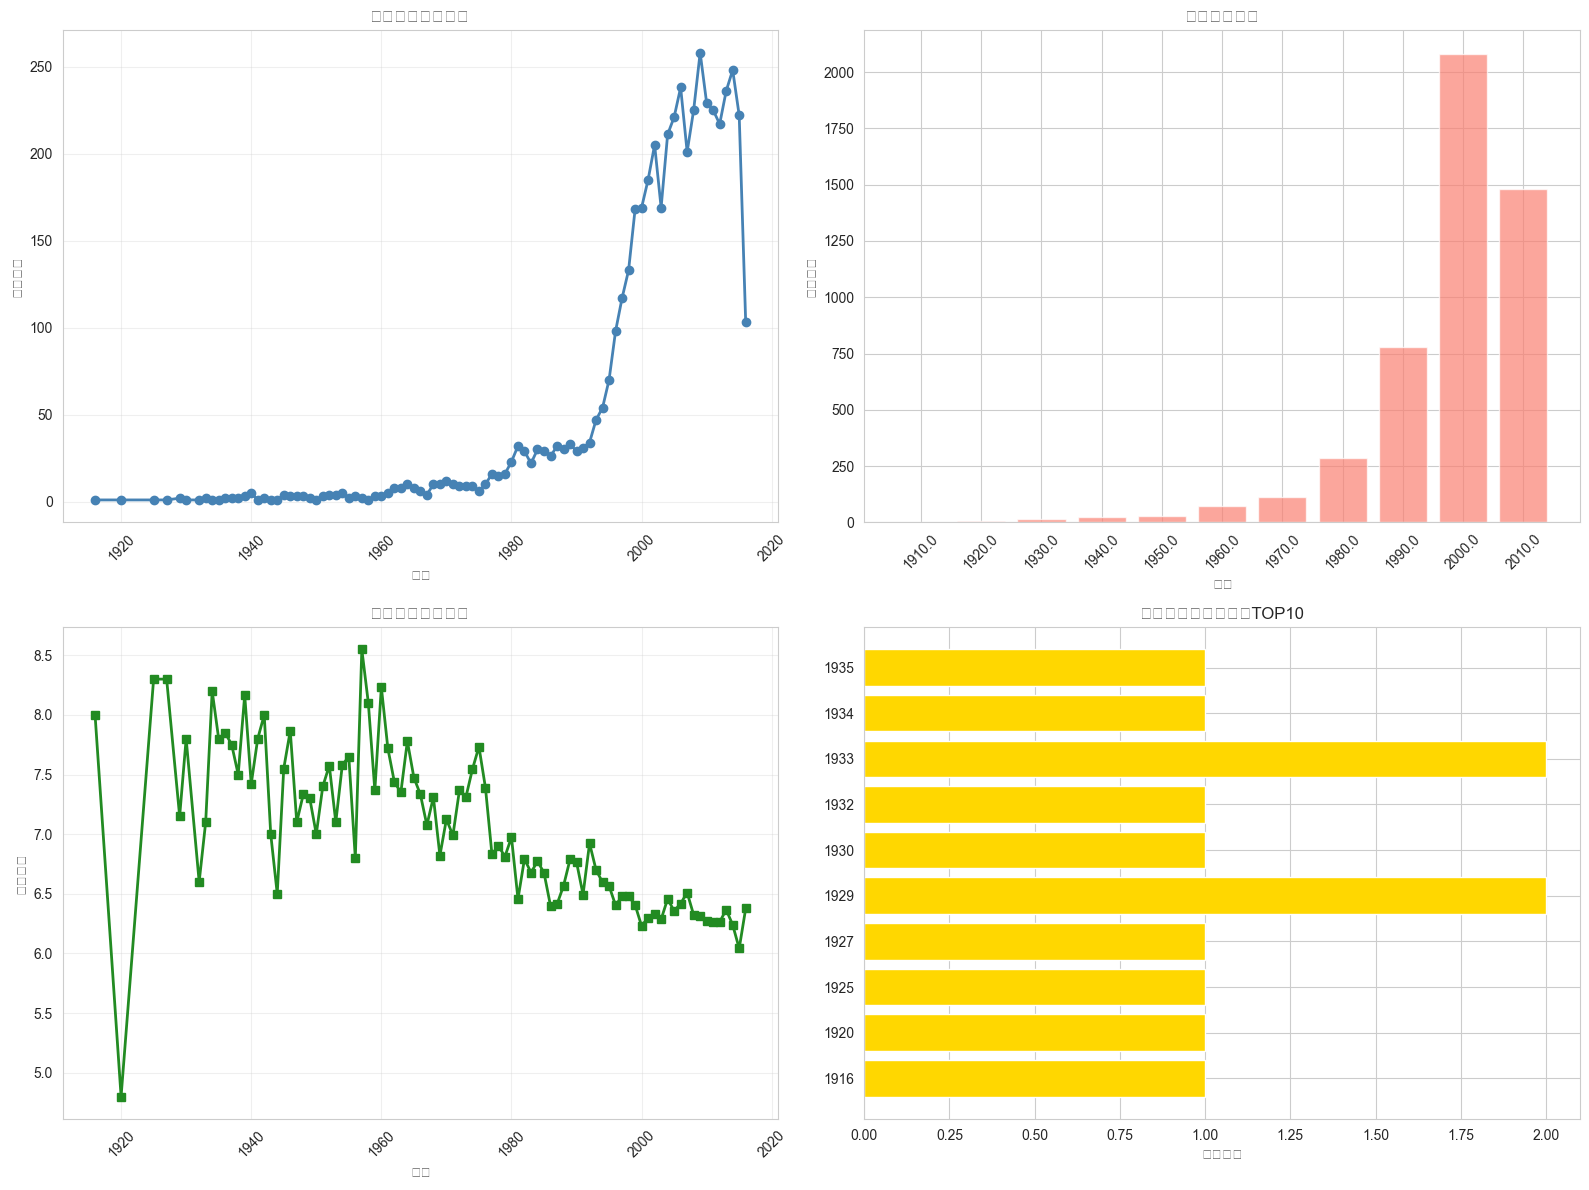


📅 电影年份范围: 1916 - 2016
🎬 电影总数: 4990

🏆 电影数量最多的5个年份:
1. 1916年: 1部电影
2. 1920年: 1部电影
3. 1925年: 1部电影
4. 1927年: 1部电影
5. 1929年: 2部电影


In [103]:
# 单元格9: 电影年份分析
if 'title_year' in movies_clean.columns:
    print("📅 电影年份分析")
    print("=" * 50)
    
    # 统计每年的电影数量
    yearly_counts = movies_clean['title_year'].value_counts().sort_index()
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. 每年电影数量
    axes[0, 0].plot(yearly_counts.index, yearly_counts.values, marker='o', linewidth=2, color='steelblue')
    axes[0, 0].set_xlabel('年份')
    axes[0, 0].set_ylabel('电影数量')
    axes[0, 0].set_title('每年电影数量趋势')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # 2. 年代分布
    decade_counts = movies_clean['decade'].value_counts().sort_index()
    axes[0, 1].bar(decade_counts.index.astype(str), decade_counts.values, color='salmon', alpha=0.7)
    axes[0, 1].set_xlabel('年代')
    axes[0, 1].set_ylabel('电影数量')
    axes[0, 1].set_title('电影年代分布')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # 3. 每年平均评分
    if 'imdb_score' in movies_clean.columns:
        yearly_ratings = movies_clean.groupby('title_year')['imdb_score'].mean().sort_index()
        axes[1, 0].plot(yearly_ratings.index, yearly_ratings.values, marker='s', linewidth=2, color='forestgreen')
        axes[1, 0].set_xlabel('年份')
        axes[1, 0].set_ylabel('平均评分')
        axes[1, 0].set_title('每年平均评分趋势')
        axes[1, 0].grid(True, alpha=0.3)
        axes[1, 0].tick_params(axis='x', rotation=45)
    
    # 4. 电影数量最多的年份TOP10
    top_years = yearly_counts.head(10)
    axes[1, 1].barh(range(len(top_years)), top_years.values, color='gold')
    axes[1, 1].set_yticks(range(len(top_years)))
    axes[1, 1].set_yticklabels(top_years.index.astype(int))
    axes[1, 1].set_xlabel('电影数量')
    axes[1, 1].set_title('电影数量最多的年份TOP10')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📅 电影年份范围: {int(movies_clean['title_year'].min())} - {int(movies_clean['title_year'].max())}")
    print(f"🎬 电影总数: {len(movies_clean)}")
    
    # 热门年份分析
    print("\n🏆 电影数量最多的5个年份:")
    for i, (year, count) in enumerate(yearly_counts.head(5).items(), 1):
        print(f"{i}. {int(year)}年: {count}部电影")

🎬 导演分析


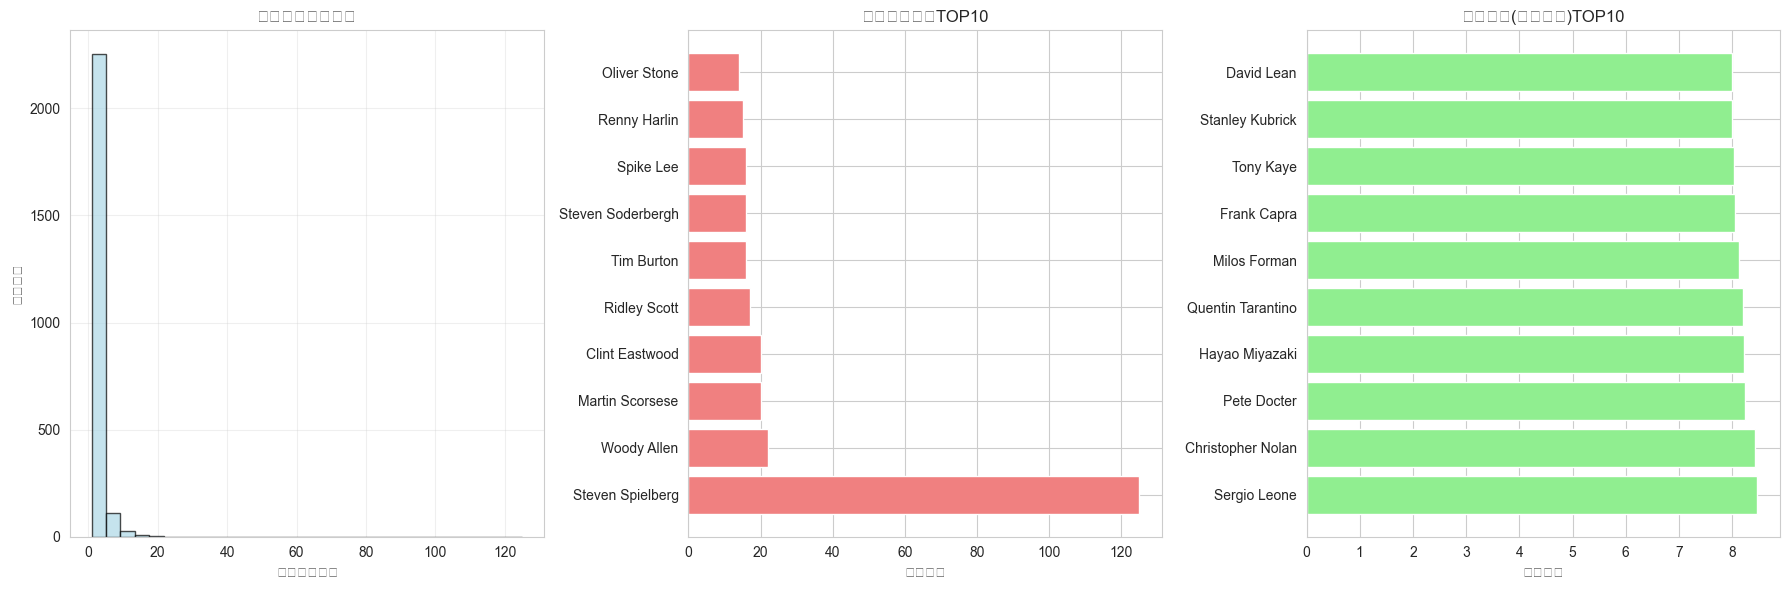


📊 导演统计:
总导演数: 2396
平均每位导演的电影数: 2.08
导演电影数中位数: 1.00

🏆 最多产的导演:
1. Steven Spielberg: 125部电影
2. Woody Allen: 22部电影
3. Martin Scorsese: 20部电影
4. Clint Eastwood: 20部电影
5. Ridley Scott: 17部电影

📈 导演Facebook点赞数与评分关系:


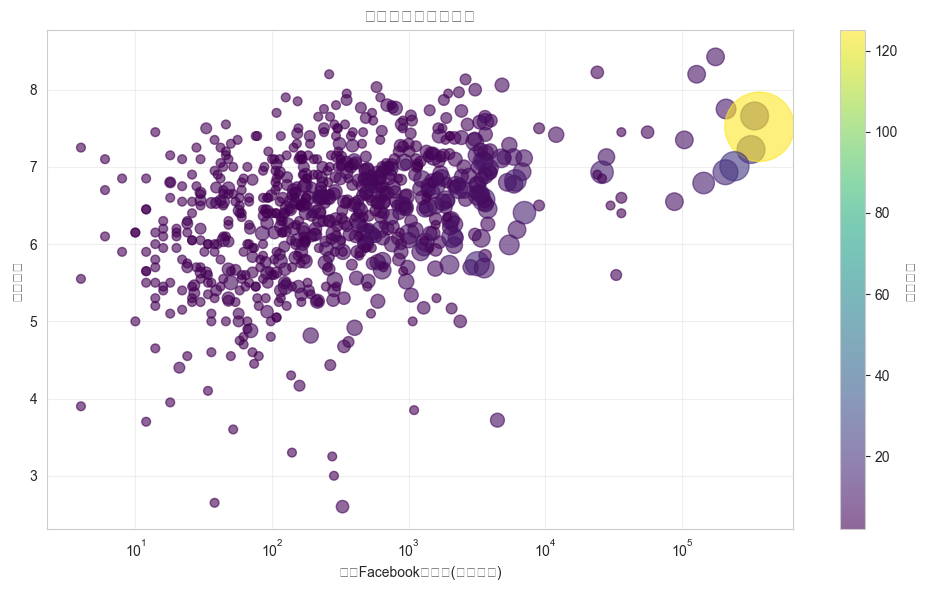

In [104]:
# 单元格10: 导演分析
if 'director_name' in movies_clean.columns:
    print("🎬 导演分析")
    print("=" * 50)
    
    # 导演作品数量统计
    director_counts = movies_clean['director_name'].value_counts()
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # 1. 导演作品数量分布
    axes[0].hist(director_counts.values, bins=30, edgecolor='black', alpha=0.7, color='lightblue')
    axes[0].set_xlabel('导演电影数量')
    axes[0].set_ylabel('导演人数')
    axes[0].set_title('导演作品数量分布')
    axes[0].grid(True, alpha=0.3)
    
    # 2. 最多产的导演TOP10
    top_directors = director_counts.head(10)
    axes[1].barh(range(len(top_directors)), top_directors.values, color='lightcoral')
    axes[1].set_yticks(range(len(top_directors)))
    axes[1].set_yticklabels(top_directors.index)
    axes[1].set_xlabel('电影数量')
    axes[1].set_title('最多产的导演TOP10')
    
    # 3. 导演平均评分（至少执导3部电影）
    if 'imdb_score' in movies_clean.columns:
        productive_directors = director_counts[director_counts >= 3].index
        productive_data = movies_clean[movies_clean['director_name'].isin(productive_directors)]
        
        director_ratings = productive_data.groupby('director_name')['imdb_score'].agg(['mean', 'count'])
        director_ratings = director_ratings[director_ratings['count'] >= 3]
        top_rated_directors = director_ratings.sort_values('mean', ascending=False).head(10)
        
        axes[2].barh(range(len(top_rated_directors)), top_rated_directors['mean'], color='lightgreen')
        axes[2].set_yticks(range(len(top_rated_directors)))
        axes[2].set_yticklabels(top_rated_directors.index)
        axes[2].set_xlabel('平均评分')
        axes[2].set_title('最佳导演(平均评分)TOP10')
    
    plt.tight_layout()
    plt.show()
    
    # 详细统计
    print("\n📊 导演统计:")
    print(f"总导演数: {len(director_counts)}")
    print(f"平均每位导演的电影数: {director_counts.mean():.2f}")
    print(f"导演电影数中位数: {director_counts.median():.2f}")
    print(f"\n🏆 最多产的导演:")
    for i, (director, count) in enumerate(director_counts.head(5).items(), 1):
        print(f"{i}. {director}: {count}部电影")
    
    if 'imdb_score' in movies_clean.columns and 'director_facebook_likes' in movies_clean.columns:
        print("\n📈 导演Facebook点赞数与评分关系:")
        director_stats = movies_clean.groupby('director_name').agg({
            'imdb_score': 'mean',
            'director_facebook_likes': 'sum',
            'movie_title': 'count'
        }).rename(columns={'movie_title': 'movie_count'})
        
        # 至少执导2部电影的导演
        director_stats = director_stats[director_stats['movie_count'] >= 2]
        
        fig, ax = plt.subplots(figsize=(10, 6))
        scatter = ax.scatter(director_stats['director_facebook_likes'], 
                            director_stats['imdb_score'], 
                            s=director_stats['movie_count']*20,  # 点的大小表示电影数量
                            alpha=0.6,
                            c=director_stats['movie_count'],
                            cmap='viridis')
        
        ax.set_xlabel('导演Facebook点赞数(对数尺度)')
        ax.set_ylabel('平均评分')
        ax.set_title('导演人气与评分关系')
        ax.set_xscale('log')
        ax.grid(True, alpha=0.3)
        
        # 添加颜色条
        cbar = plt.colorbar(scatter)
        cbar.set_label('电影数量')
        
        plt.tight_layout()
        plt.show()

🎭 电影类型分析


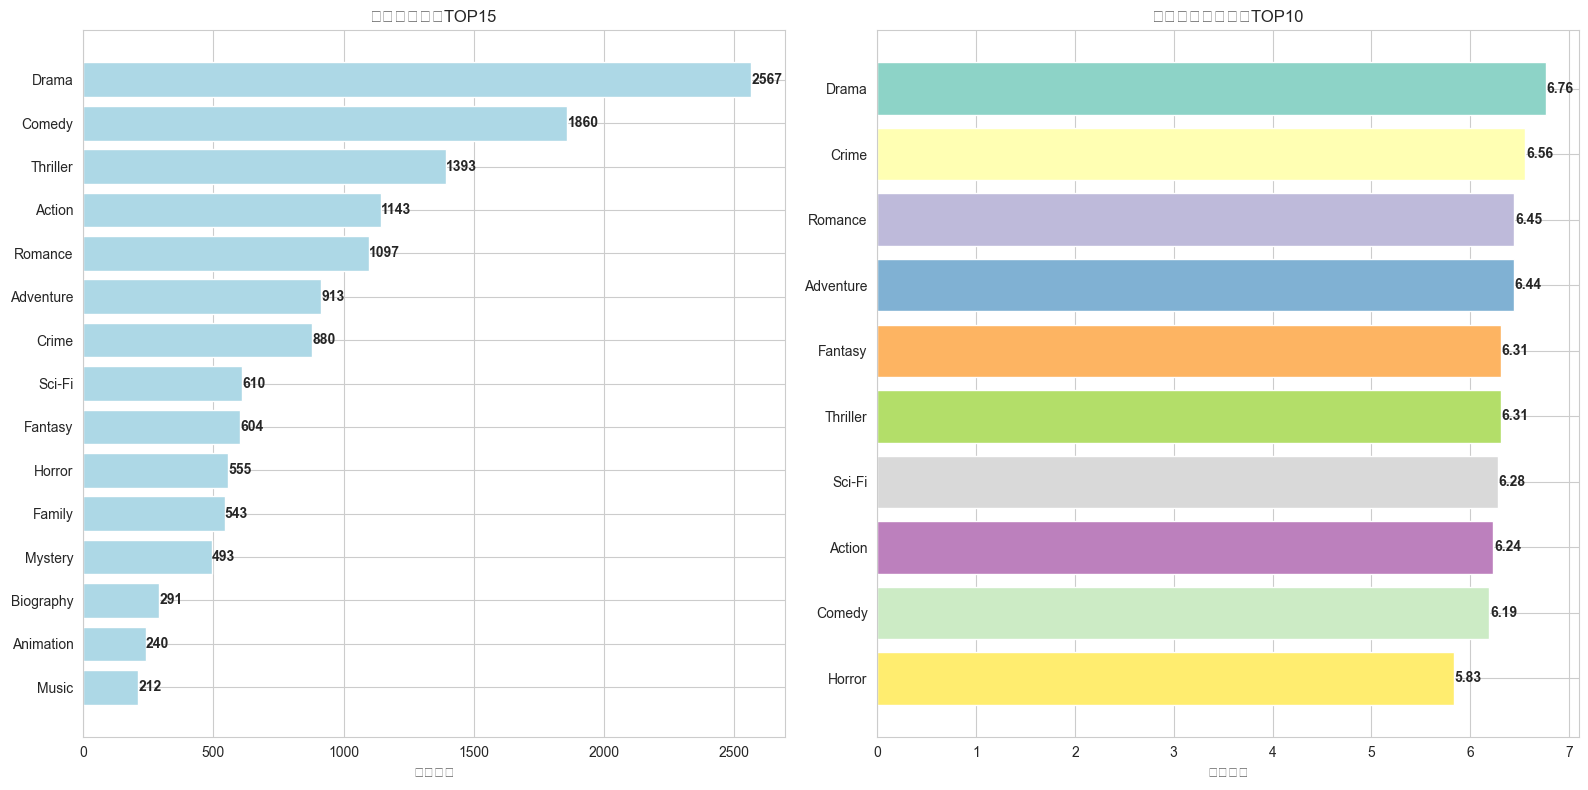


📊 电影类型统计:
总类型数: 26
平均每部电影的类型数: 2.88

🏆 最受欢迎的电影类型TOP10:
1. Drama: 2567部 (51.4%)
2. Comedy: 1860部 (37.3%)
3. Thriller: 1393部 (27.9%)
4. Action: 1143部 (22.9%)
5. Romance: 1097部 (22.0%)
6. Adventure: 913部 (18.3%)
7. Crime: 880部 (17.6%)
8. Sci-Fi: 610部 (12.2%)
9. Fantasy: 604部 (12.1%)
10. Horror: 555部 (11.1%)


In [105]:
# 单元格11: 电影类型分析
if 'genres' in movies_clean.columns:
    print("🎭 电影类型分析")
    print("=" * 50)
    
    # 展开类型（可能有多个类型用|分隔）
    all_genres = []
    for genres in movies_clean['genres'].dropna():
        if isinstance(genres, str):
            if '|' in genres:
                all_genres.extend([g.strip() for g in genres.split('|')])
            else:
                all_genres.append(genres.strip())
    
    from collections import Counter
    genre_counts = Counter(all_genres)
    
    # 取前15个类型
    top_genres = dict(sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:15])
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    # 1. 类型分布条形图
    axes[0].barh(list(top_genres.keys()), list(top_genres.values()), color='lightblue')
    axes[0].set_xlabel('电影数量')
    axes[0].set_title('电影类型分布TOP15')
    axes[0].invert_yaxis()  # 最多的在顶部
    
    # 在条形上添加数值
    for i, (genre, count) in enumerate(top_genres.items()):
        axes[0].text(count + 1, i, f'{count}', va='center', fontweight='bold')
    
    # 2. 类型与评分关系
    if 'imdb_score' in movies_clean.columns:
        # 创建类型评分字典
        genre_ratings = {}
        for genre in list(top_genres.keys())[:10]:  # 只分析前10个类型
            # 找到包含该类型的电影
            mask = movies_clean['genres'].astype(str).str.contains(genre, na=False)
            if mask.any():
                avg_rating = movies_clean.loc[mask, 'imdb_score'].mean()
                genre_ratings[genre] = avg_rating
        
        # 按评分排序
        sorted_genres = dict(sorted(genre_ratings.items(), key=lambda x: x[1], reverse=True))
        
        colors = plt.cm.Set3(np.linspace(0, 1, len(sorted_genres)))
        axes[1].barh(list(sorted_genres.keys()), list(sorted_genres.values()), color=colors)
        axes[1].set_xlabel('平均评分')
        axes[1].set_title('电影类型平均评分TOP10')
        axes[1].invert_yaxis()  # 最高分在顶部
        
        # 在条形上添加评分
        for i, (genre, rating) in enumerate(sorted_genres.items()):
            axes[1].text(rating + 0.01, i, f'{rating:.2f}', va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("\n📊 电影类型统计:")
    print(f"总类型数: {len(genre_counts)}")
    print(f"平均每部电影的类型数: {len(all_genres)/len(movies_clean):.2f}")
    
    print("\n🏆 最受欢迎的电影类型TOP10:")
    for i, (genre, count) in enumerate(list(genre_counts.most_common(10)), 1):
        percentage = (count / len(movies_clean)) * 100
        print(f"{i}. {genre}: {count}部 ({percentage:.1f}%)")

🌍 国家/地区分析


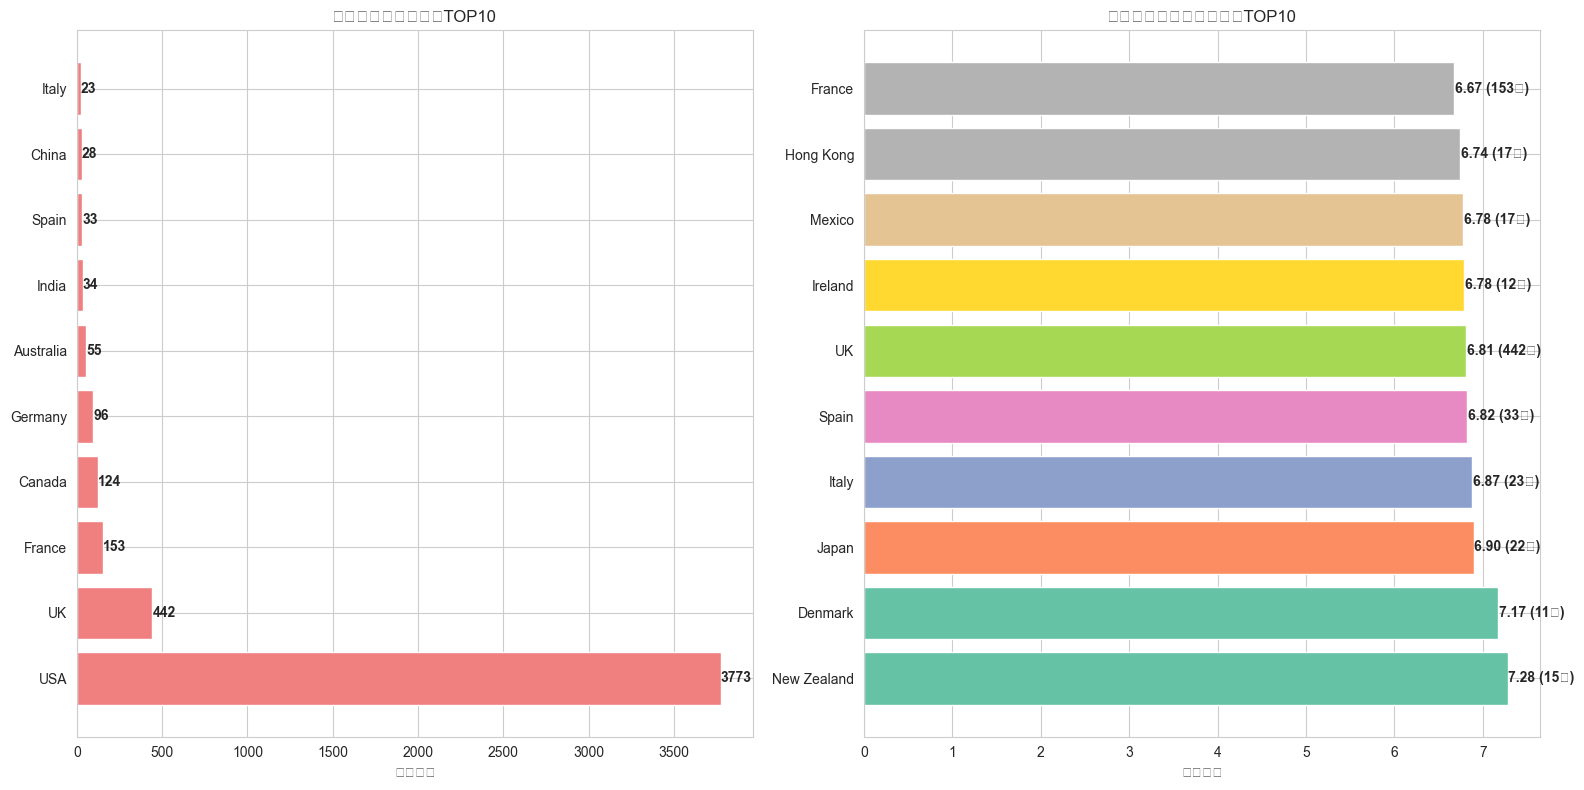


📊 国家统计:
总国家数: 65
有10部以上电影的国家数: 18

🏆 电影数量最多的5个国家:
1. USA: 3773部 (75.6%)
2. UK: 442部 (8.9%)
3. France: 153部 (3.1%)
4. Canada: 124部 (2.5%)
5. Germany: 96部 (1.9%)


In [106]:
# 单元格12: 国家/地区分析
if 'country' in movies_clean.columns:
    print("🌍 国家/地区分析")
    print("=" * 50)
    
    # 国家电影数量统计
    country_counts = movies_clean['country'].value_counts()
    
    # 只显示有足够电影的国家
    major_countries = country_counts[country_counts >= 10]
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    # 1. 主要电影生产国
    top_countries = major_countries.head(10)
    axes[0].barh(range(len(top_countries)), top_countries.values, color='lightcoral')
    axes[0].set_yticks(range(len(top_countries)))
    axes[0].set_yticklabels(top_countries.index)
    axes[0].set_xlabel('电影数量')
    axes[0].set_title('电影数量最多的国家TOP10')
    
    # 在条形上添加数量
    for i, count in enumerate(top_countries.values):
        axes[0].text(count + 1, i, f'{count}', va='center', fontweight='bold')
    
    # 2. 国家平均评分
    if 'imdb_score' in movies_clean.columns:
        country_ratings = movies_clean[movies_clean['country'].isin(major_countries.index)].groupby('country')['imdb_score'].agg(['mean', 'count'])
        country_ratings = country_ratings[country_ratings['count'] >= 5]  # 至少5部电影
        
        top_rated_countries = country_ratings.sort_values('mean', ascending=False).head(10)
        
        colors = plt.cm.Set2(np.linspace(0, 1, len(top_rated_countries)))
        axes[1].barh(range(len(top_rated_countries)), top_rated_countries['mean'], color=colors)
        axes[1].set_yticks(range(len(top_rated_countries)))
        axes[1].set_yticklabels(top_rated_countries.index)
        axes[1].set_xlabel('平均评分')
        axes[1].set_title('电影平均评分最高的国家TOP10')
        
        # 在条形上添加评分和数量
        for i, (country, row) in enumerate(top_rated_countries.iterrows()):
            axes[1].text(row['mean'] + 0.01, i, f"{row['mean']:.2f} ({int(row['count'])}部)", 
                        va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("\n📊 国家统计:")
    print(f"总国家数: {len(country_counts)}")
    print(f"有10部以上电影的国家数: {len(major_countries)}")
    
    print("\n🏆 电影数量最多的5个国家:")
    for i, (country, count) in enumerate(country_counts.head(5).items(), 1):
        percentage = (count / len(movies_clean)) * 100
        print(f"{i}. {country}: {count}部 ({percentage:.1f}%)")

💰 财务数据分析


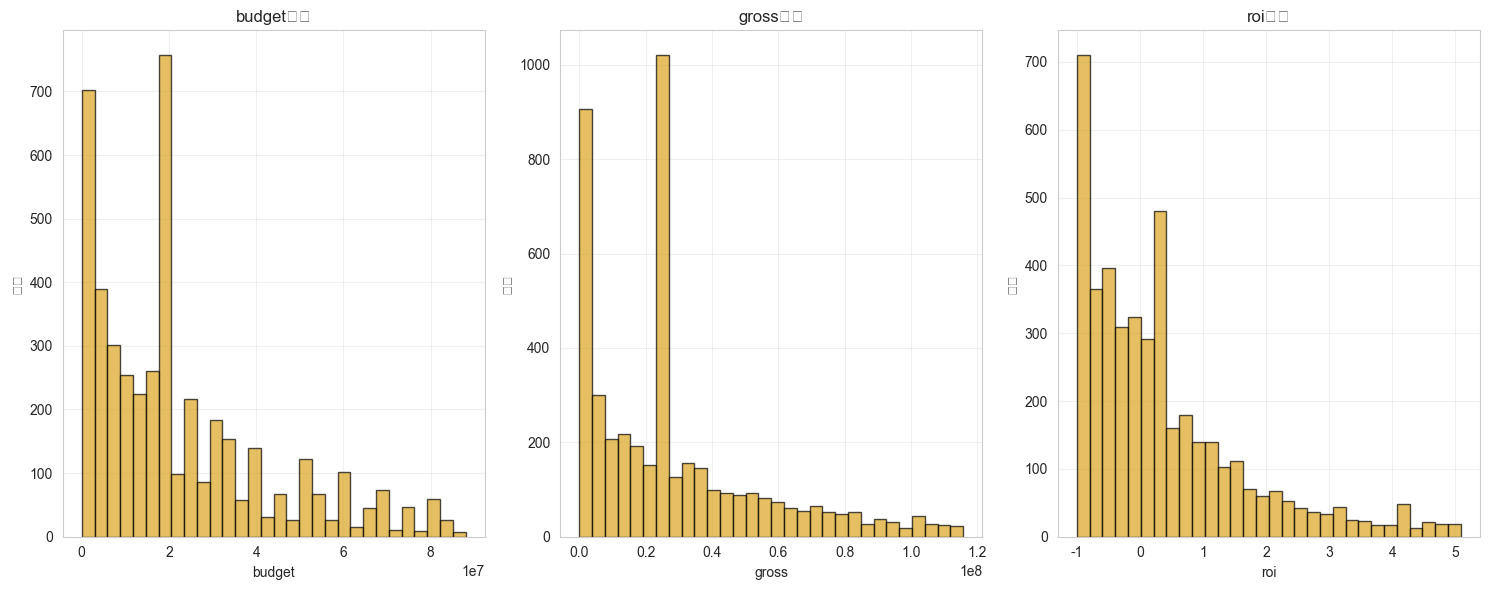


📈 财务数据统计:

budget:
  平均值: $37,848,422.57
  中位数: $20,000,000.00
  标准差: $196,868,282.90
  最小值: $218.00
  最大值: $12,215,500,000.00

gross:
  平均值: $44,368,975.99
  中位数: $25,445,749.00
  标准差: $62,383,011.21
  最小值: $162.00
  最大值: $760,505,847.00

roi:
  平均值: $16.32
  中位数: $0.27
  标准差: $310.88
  最小值: $-1.00
  最大值: $18,174.53

📊 预算与票房的相关性: 0.111
💡 结论：预算与票房有较弱的正相关关系


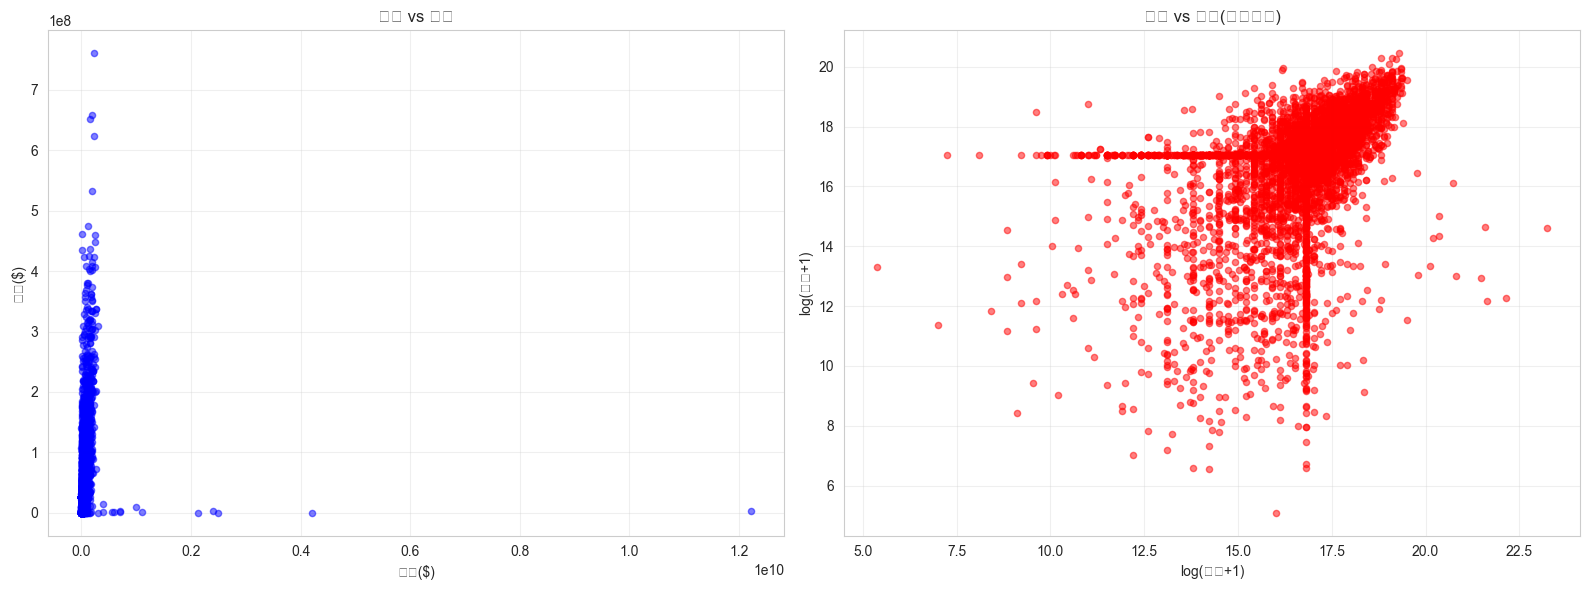

In [107]:
# 单元格13: 财务数据分析（如果存在相关列）
financial_cols = ['budget', 'gross', 'roi']
existing_financial_cols = [col for col in financial_cols if col in movies_clean.columns]

if existing_financial_cols:
    print("💰 财务数据分析")
    print("=" * 50)
    
    n_cols = len(existing_financial_cols)
    fig, axes = plt.subplots(1, n_cols, figsize=(5*n_cols, 6))
    
    if n_cols == 1:
        axes = [axes]
    
    for idx, col in enumerate(existing_financial_cols):
        # 去除异常值（使用IQR方法）
        Q1 = movies_clean[col].quantile(0.25)
        Q3 = movies_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        filtered_data = movies_clean[(movies_clean[col] >= lower_bound) & (movies_clean[col] <= upper_bound)]
        
        axes[idx].hist(filtered_data[col].dropna(), bins=30, edgecolor='black', alpha=0.7, color='goldenrod')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('频数')
        axes[idx].set_title(f'{col}分布')
        axes[idx].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 财务数据统计
    print("\n📈 财务数据统计:")
    for col in existing_financial_cols:
        print(f"\n{col}:")
        print(f"  平均值: ${movies_clean[col].mean():,.2f}")
        print(f"  中位数: ${movies_clean[col].median():,.2f}")
        print(f"  标准差: ${movies_clean[col].std():,.2f}")
        print(f"  最小值: ${movies_clean[col].min():,.2f}")
        print(f"  最大值: ${movies_clean[col].max():,.2f}")
    
    # 预算与票房关系
    if 'budget' in movies_clean.columns and 'gross' in movies_clean.columns:
        # 计算相关性
        correlation = movies_clean['budget'].corr(movies_clean['gross'])
        print(f"\n📊 预算与票房的相关性: {correlation:.3f}")
        
        if correlation > 0.5:
            print("💡 结论：预算与票房有较强的正相关关系")
        elif correlation > 0.3:
            print("💡 结论：预算与票房有中等程度的正相关关系")
        elif correlation > 0.1:
            print("💡 结论：预算与票房有较弱的正相关关系")
        else:
            print("💡 结论：预算与票房关系不明显")
        
        # 绘制散点图
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # 原始数据
        axes[0].scatter(movies_clean['budget'], movies_clean['gross'], alpha=0.5, s=20, color='blue')
        axes[0].set_xlabel('预算($)')
        axes[0].set_ylabel('票房($)')
        axes[0].set_title('预算 vs 票房')
        axes[0].grid(True, alpha=0.3)
        
        # 对数尺度
        axes[1].scatter(np.log1p(movies_clean['budget']), np.log1p(movies_clean['gross']), 
                        alpha=0.5, s=20, color='red')
        axes[1].set_xlabel('log(预算+1)')
        axes[1].set_ylabel('log(票房+1)')
        axes[1].set_title('预算 vs 票房(对数尺度)')
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

🔗 特征相关性分析


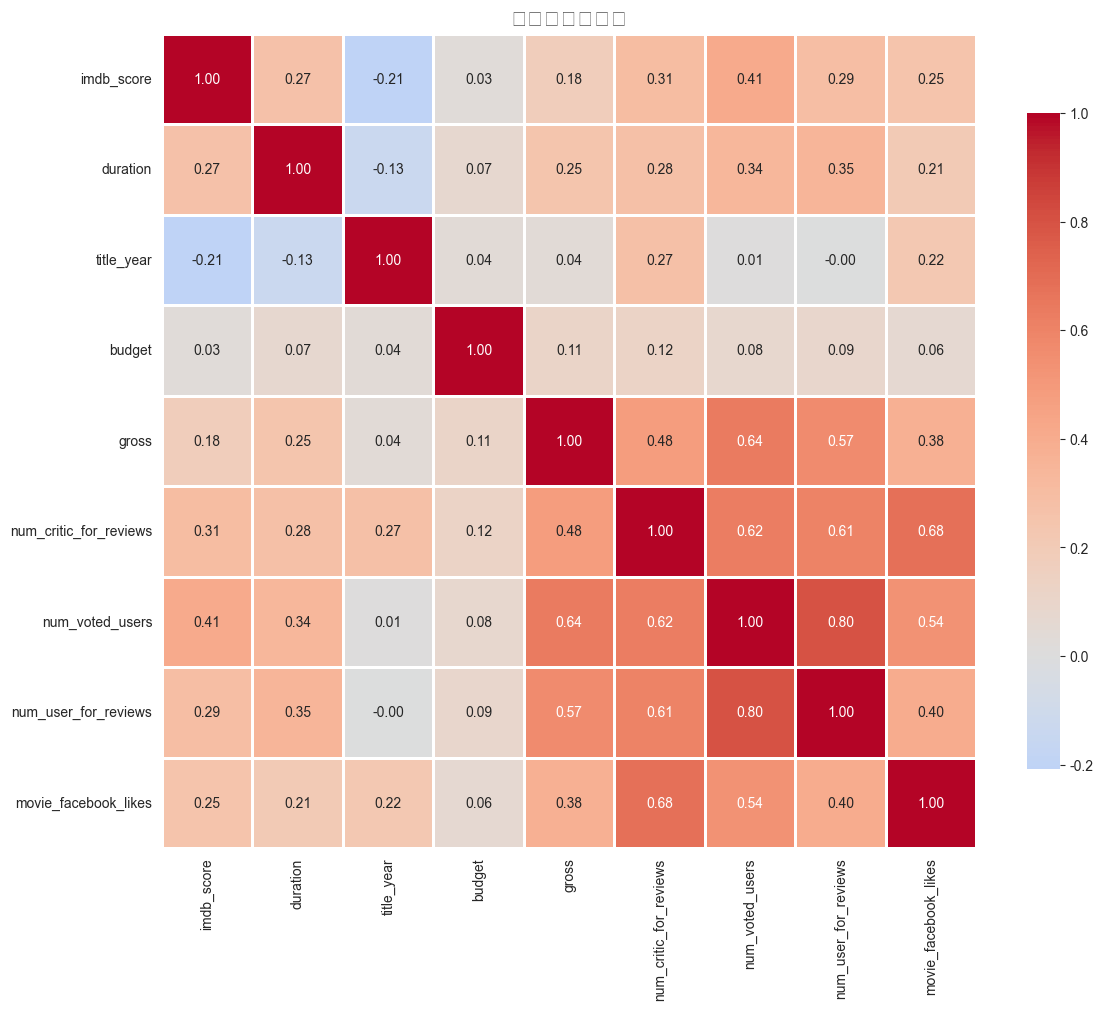


📈 与IMDb评分相关性最高的特征:
  num_voted_users: 0.412 (正相关)
  num_critic_for_reviews: 0.306 (正相关)
  num_user_for_reviews: 0.292 (正相关)
  duration: 0.269 (正相关)
  movie_facebook_likes: 0.250 (正相关)
  gross: 0.175 (正相关)
  title_year: -0.207 (负相关)


In [108]:
# 单元格14: 相关性分析
print("🔗 特征相关性分析")
print("=" * 50)

# 选择数值型列进行相关性分析
numeric_cols = movies_clean.select_dtypes(include=[np.number]).columns.tolist()

# 限制列数，避免热图过大
important_cols = ['imdb_score', 'duration', 'title_year', 'budget', 'gross', 
                  'num_critic_for_reviews', 'num_voted_users', 
                  'num_user_for_reviews', 'movie_facebook_likes']

# 只保留数据集中存在的列
available_cols = [col for col in important_cols if col in numeric_cols]

if len(available_cols) >= 3:  # 至少3个列才能做有意义的相关性分析
    correlation_matrix = movies_clean[available_cols].corr()
    
    # 创建热图
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('特征相关性热图', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # 找出与评分相关性最高的特征
    if 'imdb_score' in correlation_matrix.columns:
        rating_corr = correlation_matrix['imdb_score'].sort_values(ascending=False)
        
        print("\n📈 与IMDb评分相关性最高的特征:")
        for feature, corr_value in rating_corr.items():
            if feature != 'imdb_score':  # 排除自身
                if abs(corr_value) > 0.1:  # 只显示有一定相关性的
                    direction = "正相关" if corr_value > 0 else "负相关"
                    print(f"  {feature}: {corr_value:.3f} ({direction})")
else:
    print("⚠️ 可用的数值型特征不足，无法进行相关性分析")

In [109]:
# 单元格15: 保存分析结果
print("💾 保存分析结果")
print("=" * 50)

# 创建结果汇总
analysis_results = {
    'total_movies': len(movies_clean),
    'avg_rating': round(movies_clean['imdb_score'].mean(), 2),
    'median_rating': round(movies_clean['imdb_score'].median(), 2),
    'min_rating': round(movies_clean['imdb_score'].min(), 2),
    'max_rating': round(movies_clean['imdb_score'].max(), 2),
    'year_range': f"{int(movies_clean['title_year'].min())}-{int(movies_clean['title_year'].max())}" if 'title_year' in movies_clean.columns else "N/A"
}

if 'duration' in movies_clean.columns:
    analysis_results['avg_duration'] = round(movies_clean['duration'].mean(), 2)

if 'country' in movies_clean.columns:
    top_country = movies_clean['country'].mode()[0] if not movies_clean['country'].mode().empty else "N/A"
    analysis_results['most_common_country'] = top_country

# 保存为DataFrame
results_df = pd.DataFrame([analysis_results])
results_path = "../data/processed/analysis_summary.csv"
results_df.to_csv(results_path, index=False, encoding='utf-8')
print(f"✅ 分析摘要已保存到: {results_path}")

# 显示分析摘要
print("\n📊 分析摘要:")
for key, value in analysis_results.items():
    print(f"  {key}: {value}")

# 保存主要统计信息
if 'director_name' in movies_clean.columns:
    director_stats = movies_clean.groupby('director_name').agg({
        'imdb_score': ['mean', 'count', 'max', 'min']
    }).round(2)
    director_stats.columns = ['平均评分', '电影数量', '最高评分', '最低评分']
    director_stats_path = "../data/processed/director_stats.csv"
    director_stats.to_csv(director_stats_path, encoding='utf-8')
    print(f"✅ 导演统计已保存到: {director_stats_path}")

if 'country' in movies_clean.columns:
    country_stats = movies_clean.groupby('country').agg({
        'imdb_score': ['mean', 'count'],
        'duration': 'mean'
    }).round(2)
    country_stats.columns = ['平均评分', '电影数量', '平均时长']
    country_stats_path = "../data/processed/country_stats.csv"
    country_stats.to_csv(country_stats_path, encoding='utf-8')
    print(f"✅ 国家统计已保存到: {country_stats_path}")

print("\n🎉 数据分析完成!")

💾 保存分析结果
✅ 分析摘要已保存到: ../data/processed/analysis_summary.csv

📊 分析摘要:
  total_movies: 4990
  avg_rating: 6.44
  median_rating: 6.6
  min_rating: 1.6
  max_rating: 9.5
  year_range: 1916-2016
  avg_duration: 107.06
  most_common_country: USA
✅ 导演统计已保存到: ../data/processed/director_stats.csv
✅ 国家统计已保存到: ../data/processed/country_stats.csv

🎉 数据分析完成!
